<a href="https://colab.research.google.com/github/demonlexe/cs4375-group17/blob/main/validation_blip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing blip on validation images from dataset

References: https://github.com/huggingface/notebooks/blob/main/examples/image_captioning_blip.ipynb

# Extract URLS from ProcessedData.json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json

# Load the JSON data
with open('/content/drive/MyDrive/Colab-Notebooks/cs4375-final/ProcessedData.json', 'r') as file:
    data = json.load(file)

# Extract image URLs
image_urls = [entry['url'] for entry in data]

# Save the extracted image URLs to a new JSON file
with open('/content/drive/MyDrive/Colab-Notebooks/cs4375-final/image_urls.json', 'w') as outfile:
    json.dump(image_urls, outfile, indent=4)


In [5]:
# Get the count of URLs
url_count = len(image_urls)

print("Number of URLs:", url_count)

Number of URLs: 20926


In [6]:
# Extract the last 5926 entries
validation_image_urls = image_urls[-5926:]

# Save the validation image URLs to a new JSON file
with open('/content/drive/MyDrive/Colab-Notebooks/cs4375-final/validation_image_urls.json', 'w') as outfile:
    json.dump(validation_image_urls, outfile, indent=4)

# Peforming Inference

References: https://colab.research.google.com/github/salesforce/BLIP/blob/main/demo.ipynb#scrollTo=cbcb066b

In [9]:
from transformers import BlipForConditionalGeneration, AutoProcessor

model = BlipForConditionalGeneration.from_pretrained("ybelkada/blip-image-captioning-base-football-finetuned").to('cuda')
processor = AutoProcessor.from_pretrained("ybelkada/blip-image-captioning-base-football-finetuned")

preprocessor_config.json:   0%|          | 0.00/431 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/488 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

<Response [200]>


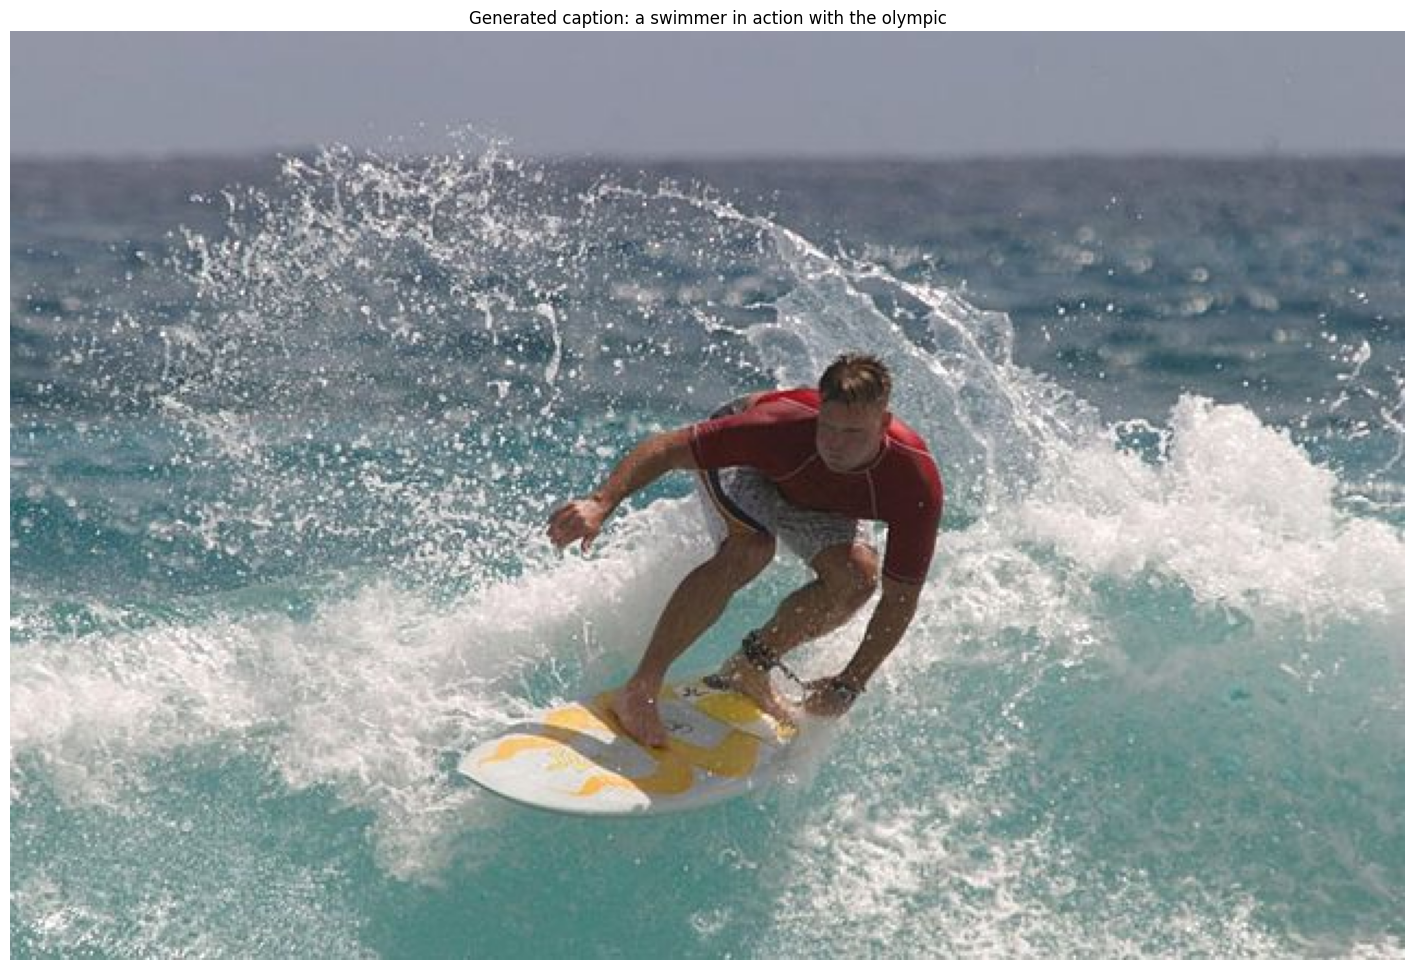

In [11]:
import json
import cv2
import numpy as np
import requests
from PIL import Image
from matplotlib import pyplot as plt

# Load validation image URLs from JSON file
with open('/content/drive/MyDrive/Colab-Notebooks/cs4375-final/validation_image_urls.json', 'r') as file:
    validation_image_urls = json.load(file)

# Choose one URL for inference (e.g., the first one)
url = validation_image_urls[0]
url = 'https://tensorflow.org/images/surf.jpg'

# Define headers for Wikipedia image download
headers = {
    'User-Agent': 'validation-blip.ipynb'
}

# Download the image using requests
response = requests.get(url, headers=headers, stream=True)
print(response)
image_array = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to PIL format
image_pil = Image.fromarray(image_rgb)

# Prepare the image for the model
inputs = processor(images=image_pil, return_tensors="pt").to('cuda')
pixel_values = inputs.pixel_values

# Generate caption
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Display the image and generated caption
plt.figure(figsize=(18, 14))
plt.imshow(image_rgb)
plt.axis("off")
plt.title(f"Generated caption: {generated_caption}")
plt.show()

In [46]:
if image is None:
    print("Image is empty. Please check the URL or download process.")

Image is empty. Please check the URL or download process.
